In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
from matplotlib import colors as mcolors
import matplotlib.ticker as ticker
import random
import numpy as np

In [2]:
df=pd.read_csv('fide_historical.csv')
dates=df['ranking_date'].unique().tolist()
df['ranking_date'] = pd.to_datetime(df['ranking_date'], format='%d-%m-%y')
df['ranking_date_int']=np.nan
df['ranking_date_int']=round((df.ranking_date - pd.to_datetime('1970-01-01')).dt.days,0).astype(int)
dates_int=df['ranking_date_int'].unique().tolist()

In [3]:
dates_mapping = dict(zip(dates_int,dates
))

In [18]:
countries=df['country'].unique().tolist()
colors=mcolors.CSS4_COLORS
colors_random=random.sample(list(colors.values()),len(countries))

mapping = dict(zip(countries,colors_random
))

In [5]:
group_lk = df.set_index('name')['country'].to_dict()

In [6]:
def draw_barchart(year):
    dff = (df[df['ranking_date_int'].eq(year)]
           .sort_values(by='rating', ascending=True)
           .tail(10))
    ax.clear()
    ax.barh(dff['name'], dff['rating'], color=[mapping[group_lk[x]] for x in dff['name']])
    dx = dff['rating'].max() / 200
    for i, (value, name) in enumerate(zip(dff['rating'], dff['name'])):
        ax.text(value-dx, i,     name,            ha='right')  # Vishwanathan Anand: name
        ax.text(value-dx, i-.25, group_lk[name],  ha='right')  # IND: country name
        ax.text(value+dx, i,     value,           ha='left')   # 2735: rating
    ax.text(1.1, 0.4, dates_mapping[year], transform=ax.transAxes, color='#777777', size=17, ha='right', weight=700)
    ax.text(0, 1.06, 'Rating', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0.2, 1.10, 'Top 10 Chess Players from 2000-2017',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)

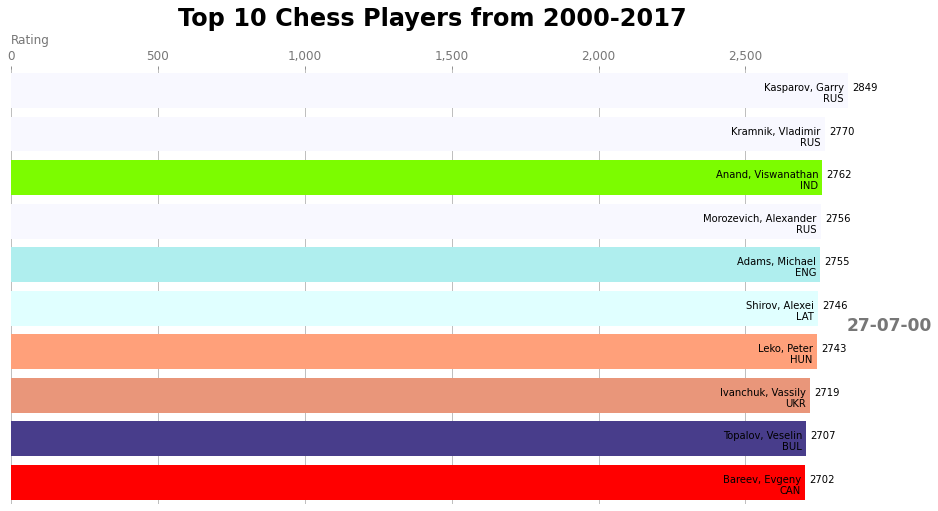

In [19]:
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=dates_int,interval=500)
#animator.save('ratings.mp4', writer='ffmpeg')
HTML(animator.to_jshtml())